# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
dados = pd.read_csv("M:\Website_Port\ebac-datascience\previsao_de_renda.csv", index_col=0)

In [37]:
dados.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [38]:
variaveis_qualitativas = ["sexo","posse_de_veiculo","posse_de_imovel","tipo_renda","educacao","estado_civil","tipo_residencia"]

In [39]:
from datetime import datetime 

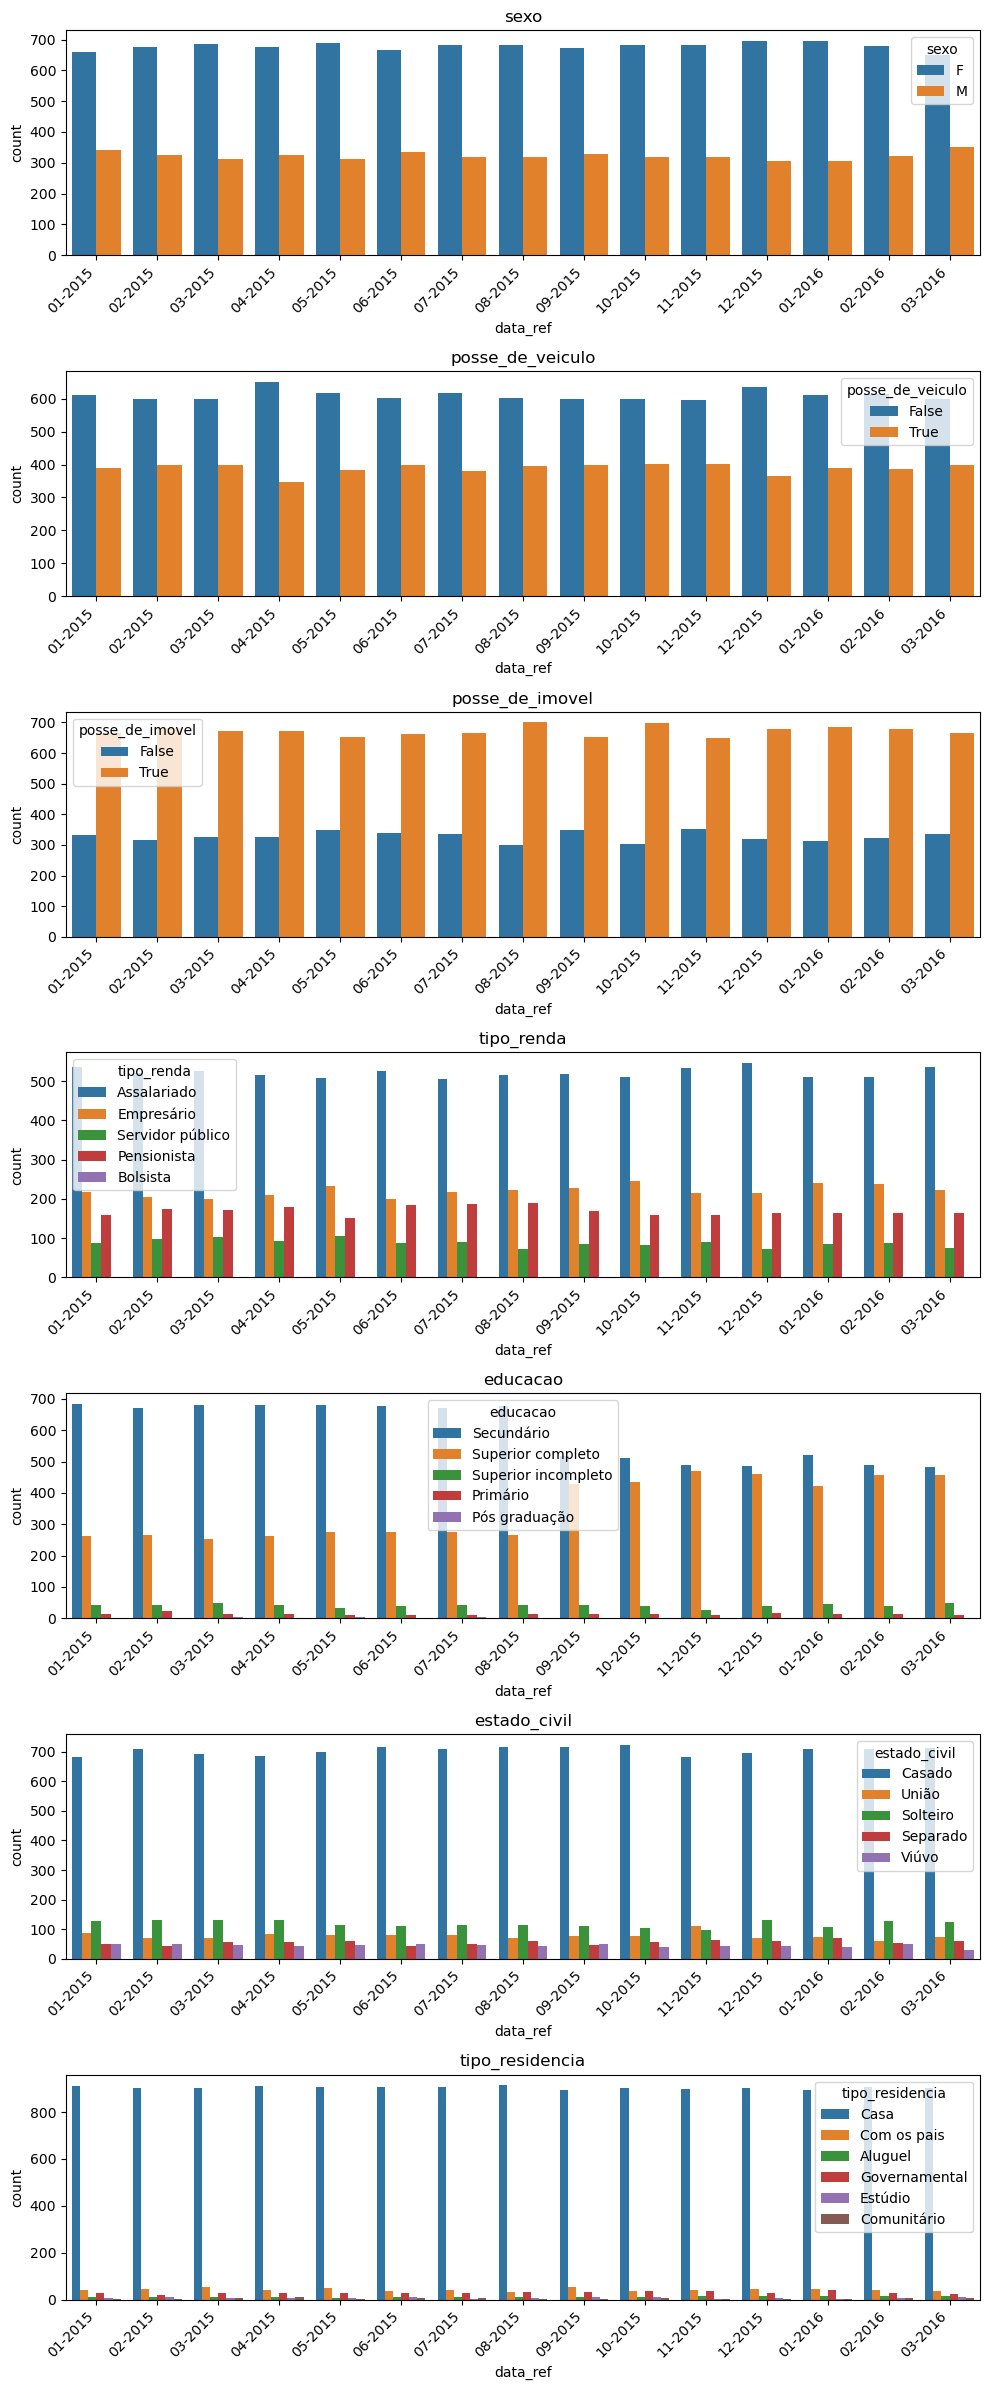

In [58]:
dados["data_ref"] = pd.to_datetime(dados["data_ref"])

fig, ax = plt.subplots(7, 1, figsize=(10, 24))

for i, variavel in enumerate(variaveis_qualitativas):
    sns.countplot(data=dados, x="data_ref", hue=variavel, ax=ax[i])
    
    datas_unicas = dados['data_ref'].sort_values().dt.to_period('M').unique()
    ax[i].set_xticklabels([date.strftime("%m-%Y") for date in datas_unicas], rotation=45, ha='right')
    
    ax[i].set_title(variavel)
plt.tight_layout()
plt.show()


Na variável educação, o número de pessoas com ensino superior subiu notavelmente e aqueles com o segundo grau caiu numa proporção elevada também - modificando, assim, a estabilidade dessa variável para o modelo.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

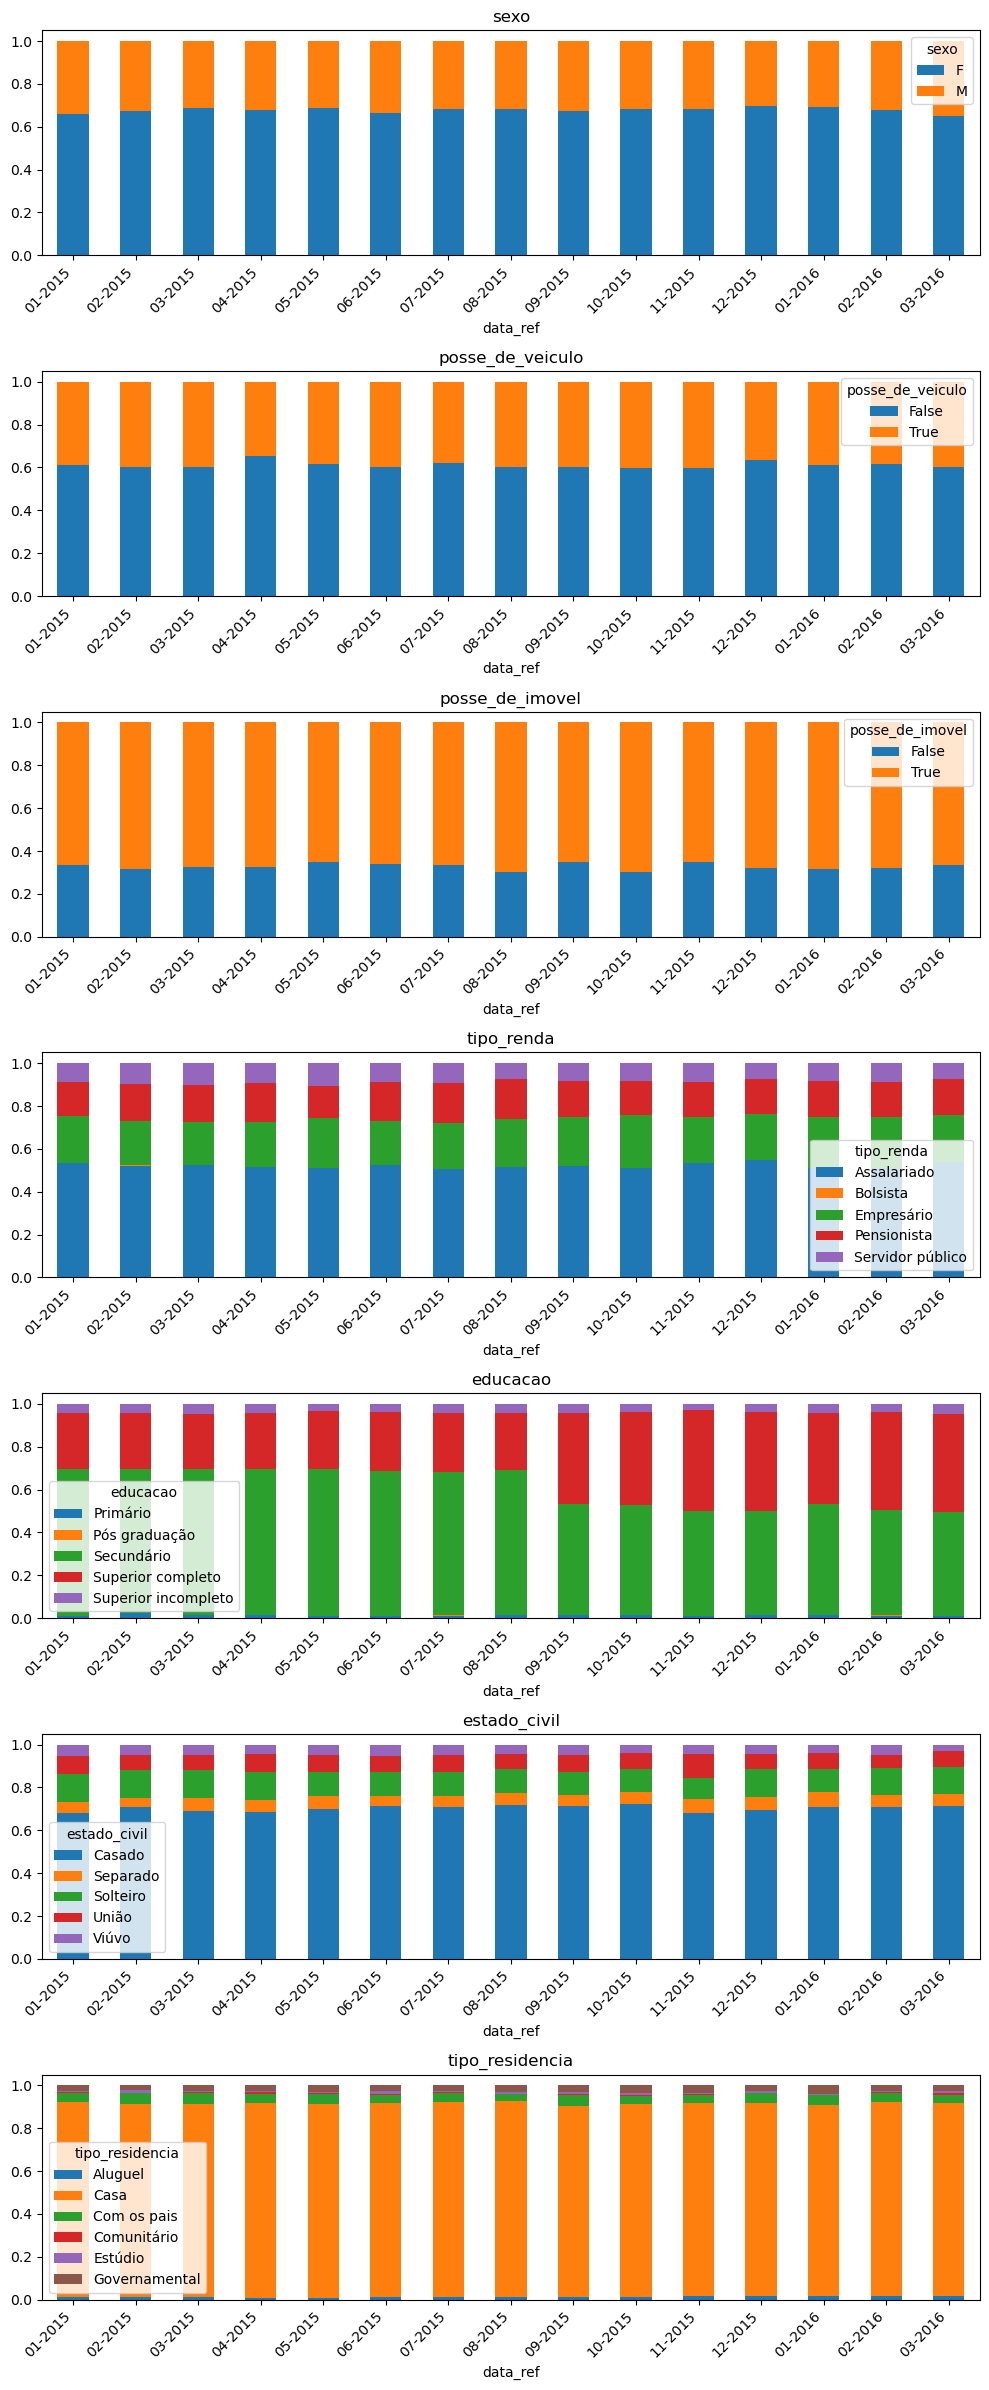

In [61]:

fig, ax = plt.subplots(7, 1, figsize=(10, 24))

for i, variavel in enumerate(variaveis_qualitativas):
    tab = pd.crosstab(dados["data_ref"], dados[variavel])
    tab = tab.div(tab.sum(axis=1), axis=0)

    ax_i = tab.plot.bar(stacked=True, ax=ax[i])  
    datas_unicas = dados['data_ref'].sort_values().dt.to_period('M').unique()
    ax_i.set_xticklabels([date.strftime("%m-%Y") for date in datas_unicas], rotation=45, ha='right')

    ax_i.set_title(variavel)

plt.tight_layout()
plt.show()


A maioria das variáveis apresenta uma certa estabilidade, com exceção de algumas categorias da variável educação. Seria importante avaliar se essa variável realmente é muito importante para o modelo, pois se não for, poderia 
ser eliminada para não causar o desbalanceamento das variáveis qualitativas. 